<a href="https://colab.research.google.com/github/Shweta-singh1/QUILL__GUARD/blob/transformer/Transformer_all_MiniLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Transformers

In [2]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6b85fc06afe802d3fe44964f68b910b788277b5dc63c41914947eef9dbf9708b
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


Import necessary libraries


In [3]:
from sentence_transformers import SentenceTransformer

In [82]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [5]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Checking the woring of the model on a pair of sentence

In [6]:
from sklearn.metrics.pairwise import cosine_similarity


In [83]:
text_2='The earth’s ocean temperatures are getting warmer, too—which means that tropical storms can pick up more energy'

In [84]:
text_1='These machines do not have any memory storage capacity but can process information and make situation-based decisions'

In [85]:
# Tokenize the input texts
encoded_dict = tokenizer(text_1, text_2, return_tensors='pt', padding=True, truncation=True)


In [86]:
# Pass the encoded texts through the model
with torch.no_grad():
    outputs = model(**encoded_dict)

In [87]:
# Get the predicted label for plagiarism
plagiarism_label = torch.argmax(outputs.logits, dim=1)

In [88]:
# Get the similarity score
similarity_score = torch.softmax(outputs.logits, dim=1)[0][1].item()

In [89]:
# Set the threshold for similarity
threshold = 0.5

In [90]:
# Print the similarity score
print("The similarity score between the two texts is:", similarity_score)

The similarity score between the two texts is: 0.5040403604507446


In [91]:
# Classify the similarity
if similarity_score >= threshold:
    print("The two texts are similar and may be considered plagiarized.")
else:
    print("The two texts are not similar and are likely not plagiarized.")

The two texts are similar and may be considered plagiarized.


Importing Data

In [15]:
#libraries for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#reading the dataset
df=pd.read_csv(r"/content/msr_paraphrase_train.txt",sep='\t',on_bad_lines='skip')

Data Cleaning

In [18]:
pd.DataFrame(df)

,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...,...,...
3933,1,1620264,1620507,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull..."
3934,0,1848001,1848224,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...
3935,1,747160,747144,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p..."
3936,1,2539933,2539850,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...


In [19]:
df.drop(['#1 ID'], axis=1,inplace=True)
df.drop(['#2 ID'], axis=1,inplace=True)

In [20]:
df.head()

,Quality,#1 String,#2 String
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [21]:
pd.DataFrame(df).rename(columns = {'Quality':'label', '#1 String':'file_1',
                              '#2 String':'file_2'}, inplace = True)

In [22]:
pd.DataFrame(df)

,label,file_1,file_2
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...
3933,1,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull..."
3934,0,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...
3935,1,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p..."
3936,1,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...


In [23]:
# Convert the label column to integers
df['label'] = df['label'].astype(int)

In [24]:
df.dropna(inplace=True)

Data visualisation

In [25]:
print(df.shape)

(3917, 3)


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 3937
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3917 non-null   int64 
 1   file_1  3917 non-null   object
 2   file_2  3917 non-null   object
dtypes: int64(1), object(2)
memory usage: 122.4+ KB
None


In [27]:
print(df.describe())

             label
count  3917.000000
mean      0.675517
std       0.468241
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [28]:
df.head()

,label,file_1,file_2
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [29]:
print(df['label'].value_counts())

1    2646
0    1271
Name: label, dtype: int64


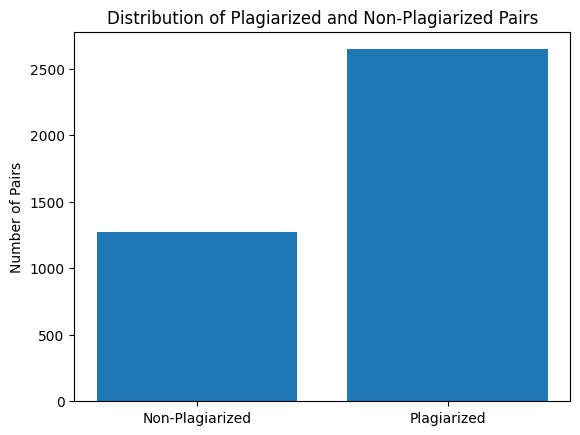

In [30]:
# Count the number of plagiarized and non-plagiarized pairs
counts = df['label'].value_counts()

# Plot a bar chart of the counts
plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ['Non-Plagiarized', 'Plagiarized'])
plt.ylabel('Number of Pairs')
plt.title('Distribution of Plagiarized and Non-Plagiarized Pairs')
plt.show()

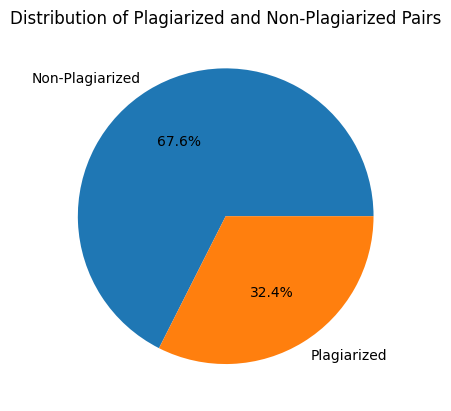

In [31]:
# Plot a pie chart of the counts
plt.pie(counts.values,labels=['Non-Plagiarized', 'Plagiarized'],autopct='%1.1f%%')
plt.title('Distribution of Plagiarized and Non-Plagiarized Pairs')
plt.show()

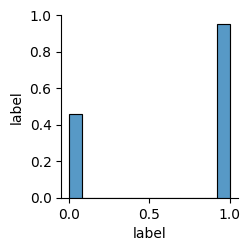

In [32]:
sns.pairplot(df)

Define a function to check similarity and return the predicted label


In [92]:
def check_similarity(text_1, text_2, threshold=0.4976):
    # Tokenize the input texts
    encoded_dict = tokenizer(text_1, text_2, return_tensors='pt', padding=True, truncation=True)

    # Pass the encoded texts through the model
    with torch.no_grad():
        outputs = model(**encoded_dict)

    # Get the similarity score
    similarity_score = torch.softmax(outputs.logits, dim=1)[0][1].item()

    # Return the predicted label based on the threshold
    if similarity_score >= threshold:
        return 1
    else:
        return 0

In [35]:
df.iloc[2594]

label                                                     0
file_1    The Boston Archdiocese has faced waves of scan...
file_2    The waves of scandal angered not only victims'...
Name: 2609, dtype: object

# Test the model on the test set and evaluate the performance


In [36]:
results = []

for index, row in df.iterrows():
    try:
        file_1 = row['file_1']
        file_2 = row['file_2']
        actual_label = row['label']
        predicted_label = check_similarity(file_1, file_2)
        results.append((file_1, file_2, actual_label, predicted_label))
    except ValueError:
        print(f"Skipping row {index} due to ValueError")
        continue


In [37]:
# Create a dataframe to display the results
results_df = pd.DataFrame(results, columns=['file_1', 'file_2', 'actual_label', 'predicted_label'])


In [38]:
results_df


,file_1,file_2,actual_label,predicted_label
0,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi...",1,0
1,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...,0,0
2,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an...",1,0
3,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ...",0,0
4,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...,1,1
...,...,...,...,...
3912,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull...",1,0
3913,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...,0,0
3914,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p...",1,1
3915,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,1,1


In [51]:
# Calculate the accuracy
accuracy = (results_df['actual_label'] == results_df['predicted_label']).mean()
print(f"Accuracy: {accuracy}")


Accuracy: 0.46693898391626243


In [52]:
y_test=results_df['actual_label']
y_pred=results_df['predicted_label']

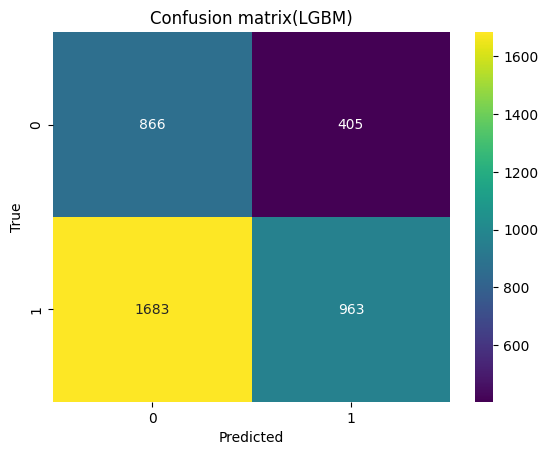

In [56]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(cm2, annot=True, cmap="viridis", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(LGBM)")
plt.show()

#Deployment 

Function that check plagiarism in text strings

In [40]:
def check_plagiarism(text_1, text_2):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
    model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)

    # Tokenize the input texts
    encoded_dict = tokenizer(text_1, text_2, return_tensors='pt', padding=True, truncation=True)

    # Pass the encoded texts through the model
    with torch.no_grad():
        outputs = model(**encoded_dict)

    # Get the predicted label for plagiarism
    plagiarism_label = torch.argmax(outputs.logits, dim=1)

    # Get the similarity score
    similarity_score = torch.softmax(outputs.logits, dim=1)[0][1].item()

    # Set the threshold for similarity
    threshold = 0.5

    # Classify the similarity
    if similarity_score >= threshold:
        result = "The two texts are similar and may be considered plagiarized."
    else:
        result = "The two texts are not similar and are likely not plagiarized."

    return result, similarity_score
    print(result, similarity_score)

In [57]:
text_1='These machines do not have any memory storage capacity but can process information and make situation-based decisions'

In [58]:
text_2='The earth’s ocean temperatures are getting warmer, too—which means that tropical storms can pick up more energy'

In [63]:
check_plagiarism(text_1, text_2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


('The two texts are not similar and are likely not plagiarized.',
 0.49998554587364197)

Function that check plagiarism in files

In [64]:
def check_plagiarism_files(file_path_1, file_path_2):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
    model = AutoModelForSequenceClassification.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', num_labels=2)

    # Read the contents of the input files
    with open(file_path_1, 'r') as f1, open(file_path_2, 'r') as f2:
        text_1 = f1.read()
        text_2 = f2.read()

    # Tokenize the input texts
    encoded_dict = tokenizer(text_1, text_2, return_tensors='pt', padding=True, truncation=True)

    # Pass the encoded texts through the model
    with torch.no_grad():
        outputs = model(**encoded_dict)

    # Get the predicted label for plagiarism
    plagiarism_label = torch.argmax(outputs.logits, dim=1)

    # Get the similarity score
    similarity_score = torch.softmax(outputs.logits, dim=1)[0][1].item()

    # Set the threshold for similarity
    threshold = 0.4265945

    # Classify the similarity
    if similarity_score >= threshold:
        result = "The two texts are similar and may be considered plagiarized."
    else:
        result = "The two texts are not similar and are likely not plagiarized."

    return result, similarity_score
    print(result, similarity_score)

In [45]:
result=check_plagiarism_files('/content/arti.txt','/content/global.txt')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
results=check_plagiarism_files('/content/tech.text.txt','/content/techp.txt')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [80]:
print(results)

('The two texts are similar and may be considered plagiarized.', 0.5007045865058899)


In [81]:
print(result)

('The two texts are similar and may be considered plagiarized.', 0.49704301357269287)
